<center>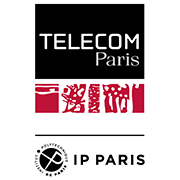</center>

<h1><center><strong><font color="green">IA 717: CHAI & fairness: linguistics of AI ethics charters & manifestos</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> <a>Maria Boritchev</a></h3>
<email>maria.boritchev@telecom-paris.fr</email>
<br/>

Year 2025-2026
</center>

------------------------

# <font color="green">**Context and objectives**</font>

> The recent years have seen a surge of initiatives with the goal of defining what “ethical” artificial intelligence would or should entail, resulting in the publication of various charters and manifestos discussing AI ethics; these documents originate from academia, AI industry companies, non-profits, regulatory institutions, and the civil society. The contents of such documents vary wildly, from short, vague position statements to verbatims of democratic debates or impact assessment studies. As such, they are a marker of the social world of artificial intelligence, outlining the tenets of different actors, the consensus and dissensus on important goals, and so on. <a href="https://mapaie.telecom-paris.fr/mapaie-paper.pdf">Mapping AI Ethics: a meso-scale analysis of its charters and manifestos, M. Gornet et al, 2024.</a>

The objective of this project to study the linguistic specificities of a corpus of charters and manifestos of AI ethics, called ```MapAIE```. We will study the semantic structure of sentences from MapAIE using the Abstract Meaning Representation (<a href="https://github.com/amrisi/amr-guidelines/blob/master/amr.md">AMR</a>) abstraction method. In particular, we will focus on the usage and the environment of the term _fairness_, in order to see its context and the (possibly different?) meanings associated with its usage.

This project is organised in three subtasks:
1) Data retrieval and exploration.
2) Exploration of the term _fairness_ in the data.
3) AMR graphs exploration & exploration of the term _fairness_ in AMR graphs.


### <font color="green">Evaluation</font>

The project is evaluated through a presentation with a report and your completed project, documented with a README. Grades will be partly individual and partly collective. 

# <font color="green">**1 - Data Presentation and Retrieval**</font>

Our main corpus is called _MapAIE - Mapping AI Ethics_. It is a collection of 436 common charters and manifestos around artificial intelligence and AI ethics. The corpus' <a href="https://mapaie.telecom-paris.fr/mapaie-datasheet.pdf">datasheet</a> provides detailed information about the collection process and the contents of the corpus. 

<font color="red">1.1 Question:</font> Using the git repository https://gitlab.telecom-paris.fr/tiphaine.viard/mapaie, build the data locally. How many documents are there in the ```./pdf``` folder? in the ```./txt``` folder?

In [1]:
import os
from pathlib import Path

pdf_count = sum(1 for f in Path("mapaie/data/docs").iterdir() if f.is_file() and f.suffix == ".pdf")
html_count = sum(1 for f in Path("mapaie/data/docs").iterdir() if f.is_file() and f.suffix == ".html")
txt_count = sum(1 for f in Path("mapaie/data/txts").iterdir() if f.is_file() and f.suffix == ".txt")
txt_preprocessed_count = sum(1 for f in Path("mapaie/data/preprocessed").iterdir() if f.is_file() and f.suffix == ".txt")

print(f"PDF files: {pdf_count}")
print(f"HTML files: {html_count}")
print(f"TXT files: {txt_count}")
print(f"Preprocessed TXT files: {txt_preprocessed_count}")

PDF files: 417
HTML files: 383
TXT files: 650
Preprocessed TXT files: 650


In [ ]:
HTML files

<font color="yellow">1.1 Answer:</font>

If the answer in the previous question is different from 436, reduce the local data by keeping only the documents that should be included in the corpus. These documents are identified in the file `all_manifestos.csv`, these are the documents which state `Included`in the column `Status`. 

Let's explore the data. As you can see, documents in ```./pdf``` folder and documents in the ```./txt``` folder are the same, and the name formatting is such that ```n.txt``` contains plain text extracted from ```n.pdf```.

In [2]:
pdf_ids = [int(f.stem) for f in Path("mapaie/data/docs").iterdir() if f.is_file() and f.suffix == ".pdf"]
html_ids = [int(f.stem) for f in Path("mapaie/data/docs").iterdir() if f.is_file() and f.suffix == ".html"]
txt_ids = [int(f.stem) for f in Path("mapaie/data/txts").iterdir() if f.is_file() and f.suffix == ".txt"]

In [3]:
import pandas as pd

doc_ids = list(set(pdf_ids + html_ids))

all_manifestos = pd.read_csv('mapaie/all_manifestos.csv')

In [4]:
with open("mapaie/log/dl_docs.log", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]

statuses = [line.split(",")[-1].strip() for line in lines]

status_series = pd.Series(statuses, name="HTTP code")
all_manifestos['HTTP code'] = status_series

In [5]:
print(all_manifestos[all_manifestos.index.isin(doc_ids)].shape)
print(all_manifestos[all_manifestos.index.isin(txt_ids)].shape)

(655, 31)
(650, 31)


In [6]:
# all_manifestos[all_manifestos['Status'].isin(['included', 'Included'])]

In [7]:
# all_manifestos[all_manifestos.index.isin(list(set(doc_ids + txt_ids))) & all_manifestos['Status'].isin(['included', 'Included'])]

In [8]:
all_manifestos['Status'] = all_manifestos['Status'].apply(lambda x: x.strip().lower())

In [9]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

all_manifestos[all_manifestos.index.isin(pdf_ids) & (all_manifestos['Status'].isin(['included']))][['URL', 'Status', 'Label']].shape

(280, 3)

In [10]:
all_manifestos[all_manifestos.index.isin(html_ids) & (all_manifestos['Status'].isin(['included']))][['URL', 'Status', 'Label']].shape

(203, 3)

In [11]:
all_manifestos[all_manifestos.index.isin(doc_ids) & (all_manifestos['Status'].isin(['included']))][['URL', 'Status', 'Label']].shape

(394, 3)

In [36]:
all_manifestos[~all_manifestos.index.isin(txt_ids) & (all_manifestos['Status'].isin(['included']))][['URL', 'Status', 'Label', 'HTTP code']]

,URL,Status,Label,HTTP code
115,https://www.coe.int/en/web/artificial-intelligence/ai-and-control-of-covid-19-coronavirus,included,SPI issue-specific,403
246,https://publications.jrc.ec.europa.eu/repository/handle/JRC113826 direct download url https://publications.jrc.ec.europa.eu/repository/bitstream/JRC113826/ai-flagship-report-online.pdf,included,SPI,404
260,https://ai.equineteurope.org/system/files/2022-06/Equinet-Position-Paper-on-AI-and-Equality.pdf,included,NaN,403
297,https://www.europarl.europa.eu/stoa/en/document/EPRS_STU(2020)634452 direct url http://www.europarl.europa.eu/RegData/etudes/STUD/2020/634452/EPRS_STU(2020)634452_EN.pdf,included,"SPI, issue-specific",404
383,https://ico.org.uk/for-organisations/guide-to-data-protection/key-dp-themes/guidance-on-artificial-intelligence-and-data-protection/ new url https://ico.org.uk/for-organisations/uk-gdpr-guidance-and-resources/artificial-intelligence/guidance-on-ai-and-data-protection/,included,issue-specific,404
388,https://ico.org.uk/media/for-organisations/guide-to-data-protection/key-dp-themes/explaining-decisions-made-with-artificial-intelligence-1-0.pdf,included,"SPI, issue-specific",404
389,https://www.itic.org/public-policy/ITIAIPolicyPrinciplesFINAL.pdf new doc https://www.itic.org/documents/artificial-intelligence/ITI_GlobalAIPrinciples_032321_v3.pdf,included,SPI,404
451,https://julkaisut.valtioneuvosto.fi/bitstream/handle/10024/160980/TEMjul_21_2018_Work_in_the_age.pdf?sequence=1&isAllowed=y,included,"SPI, field-specific",403
453,https://julkaisut.valtioneuvosto.fi/bitstream/handle/10024/160980/TEMjul_21_2018_Work_in_the_age.pdf,included,"SPI, field-specific",403
455,http://julkaisut.valtioneuvosto.fi/bitstream/handle/10024/161688/41_19_Leading%20the%20way%20into%20the%20age%20of%20artificial%20intelligence.pdf,included,SPI (strategy),403


In [13]:
all_manifestos[(all_manifestos['Status'].isin(['included']))][['URL', 'Status', 'Label', 'HTTP code']].shape

(437, 4)

- The document 657 is in docx format, converted to pdf.
- The URL for the document 480 is corrected.

<font color="red">1.2 Question:</font> Why is it useful to have the data both in .pdf and .txt format? Cite one advantage and one drawback for linguistic analysis for each of the formats.

<font color="orange">1.2 Answer:</font> 

We need to save the orginal text in PDF format for further potential use. The PDF files keep all the original format, font and structured text. The .txt files are much easier to process by the analysis tools.

We now want to know more about words and key-words used throughout the corpus. There are several terms that are widely used when writing about ethics of AI, and it is interesting from a linguistic point of view to see where and how these words occur. 

<font color="red">1.3 Question:</font> what are the most frequent words, excluding stopwords, in the whole corpus? Please provide visualizations and comment these visualisations.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


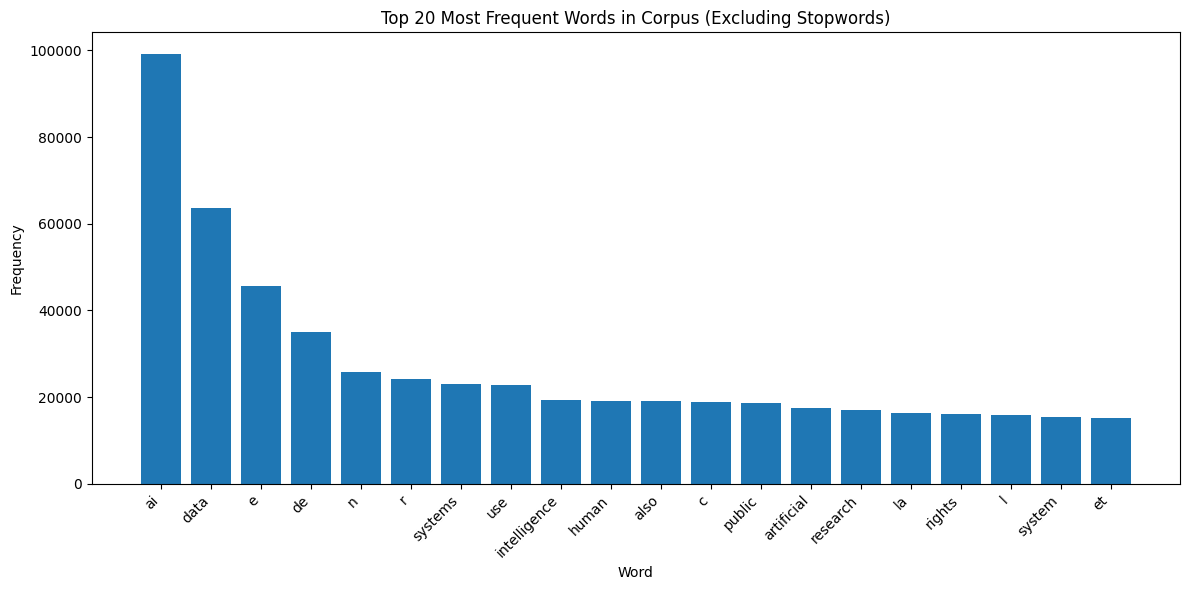

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# make sure stopwords are downloaded
nltk.download("stopwords")

# path to your folder with txt files
folder = "mapaie/data/txts"

# load english stopwords (extendable if texts are in another language)
stop_words = set(stopwords.words("english"))

# read all txt files
corpus = []
for file in os.listdir(folder):
    if file.endswith(".txt"):
        with open(os.path.join(folder, file), "r", encoding="utf-8") as f:
            corpus.append(f.read().lower())

# join everything into one big text
text = " ".join(corpus)

# tokenize (simple split by whitespace, could use nltk.word_tokenize for more precision)
words = [w.strip(".,!?;:()[]{}\"'") for w in text.split()]
words = [w for w in words if w.isalpha() and w not in stop_words]

# count frequencies
word_freq = Counter(words)

# convert to pandas for easier plotting
df = pd.DataFrame(word_freq.most_common(20), columns=["Word", "Frequency"])

# plot top 20 frequent words
plt.figure(figsize=(12,6))
plt.bar(df["Word"], df["Frequency"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Most Frequent Words in Corpus (Excluding Stopwords)")
plt.ylabel("Frequency")
plt.xlabel("Word")
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


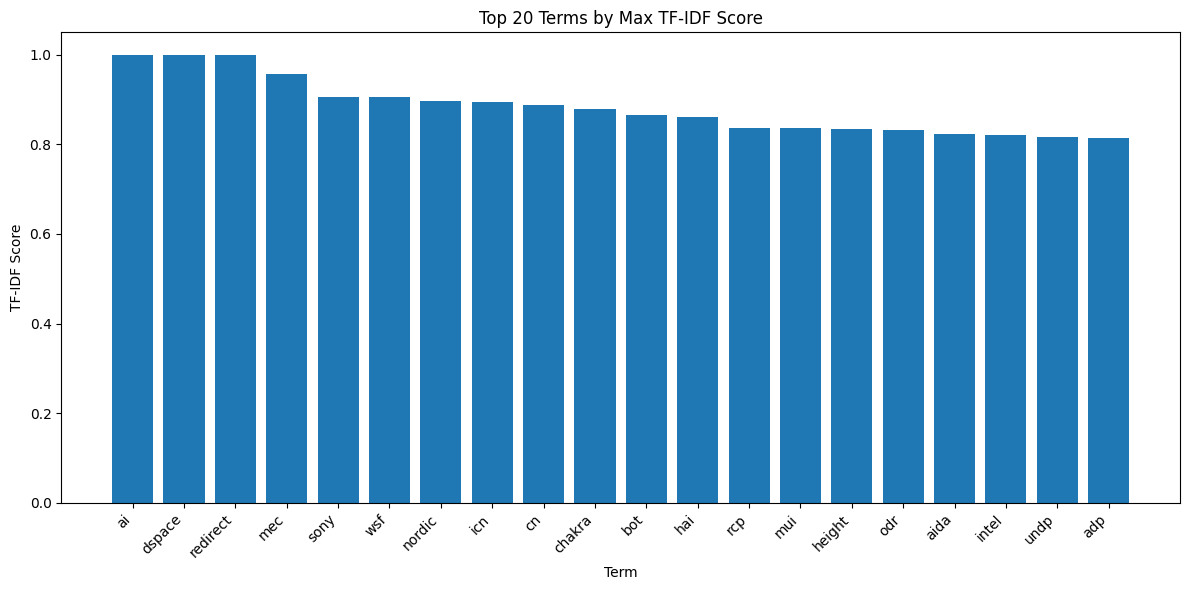

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import numpy as np

# Make sure stopwords are downloaded
nltk.download("stopwords")

# Path to your folder with txt files
folder = "mapaie/data/txts"

# Load English stopwords as a list
stop_words = list(stopwords.words("english"))

# --- Step 1: Read all txt files ---
documents = []
filenames = []
for file in os.listdir(folder):
    if file.endswith(".txt"):
        with open(os.path.join(folder, file), "r", encoding="utf-8") as f:
            documents.append(f.read().lower())
            filenames.append(file)

# --- Step 2: Initialize TF-IDF vectorizer ---
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    token_pattern=r'\b[a-zA-Z]{2,}\b'
)

# --- Step 3: Fit vectorizer ---
tfidf_matrix = vectorizer.fit_transform(documents)
terms = vectorizer.get_feature_names_out()

# --- Step 4: Compute max TF-IDF per term ---
# Ensure it's a 1D numpy array with same length as 'terms'
max_tfidf_scores = tfidf_matrix.max(axis=0).toarray().flatten()

# Check lengths (should match)
assert len(terms) == len(max_tfidf_scores), f"Length mismatch: {len(terms)} vs {len(max_tfidf_scores)}"

# --- Step 5: Create DataFrame and sort ---
tfidf_df = (
    pd.DataFrame({"Term": terms, "Max_TFIDF": max_tfidf_scores})
    .sort_values(by="Max_TFIDF", ascending=False)
    .head(20)
)

# --- Step 6: Plot ---
plt.figure(figsize=(12, 6))
plt.bar(tfidf_df["Term"], tfidf_df["Max_TFIDF"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Terms by Max TF-IDF Score")
plt.ylabel("TF-IDF Score")
plt.xlabel("Term")
plt.tight_layout()
plt.show()

<font color="orange">1.3 Answer:</font> 

# <font color="green">**2 - Exploration of the term _fairness_ in the data**</font>


<font color="red">2.1 Question:</font> Draw a visualisation of the amount of times the term _fairness_ is used in a document compared with the total amount of words in a document. Comment this viualisation: what can we observe? What hypothesis can we draw from this observation?

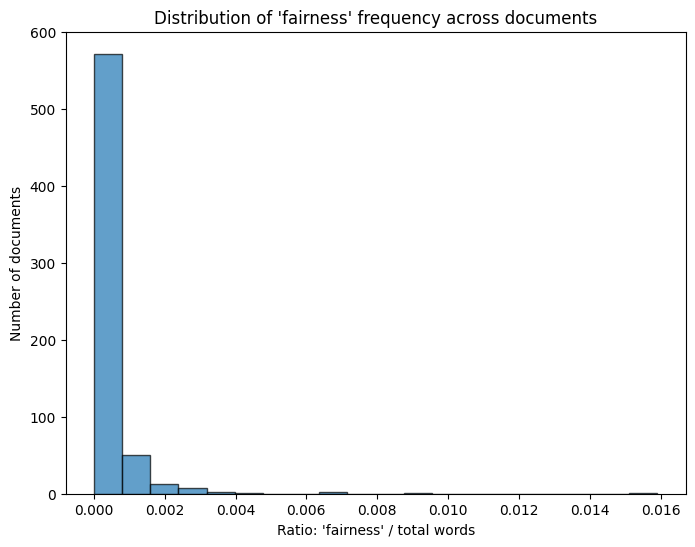

In [16]:
# To-do

import matplotlib.pyplot as plt
from pathlib import Path

ratios = []
txt_dir = Path("mapaie/data/txts")

for f in txt_dir.iterdir():
    if f.is_file() and f.suffix == ".txt":
        text = f.read_text(encoding="utf-8", errors="ignore")
        words = text.split()
        total_words = len(words)
        fairness_count = sum(1 for w in words if w.lower().strip(".,!?") == "fairness")
        ratio = fairness_count / total_words if total_words > 0 else 0
        ratios.append(ratio)

# Histogram visualization
plt.figure(figsize=(8, 6))
plt.hist(ratios, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Ratio: 'fairness' / total words")
plt.ylabel("Number of documents")
plt.title("Distribution of 'fairness' frequency across documents")
plt.show()

<font color="orange">2.1 Answer:</font> 

<font color="red">2.2 Question:</font> which are the documents in which the term _fairness_ appears the most (top 10% of the corpus)? Please provide a visualization and comment it.

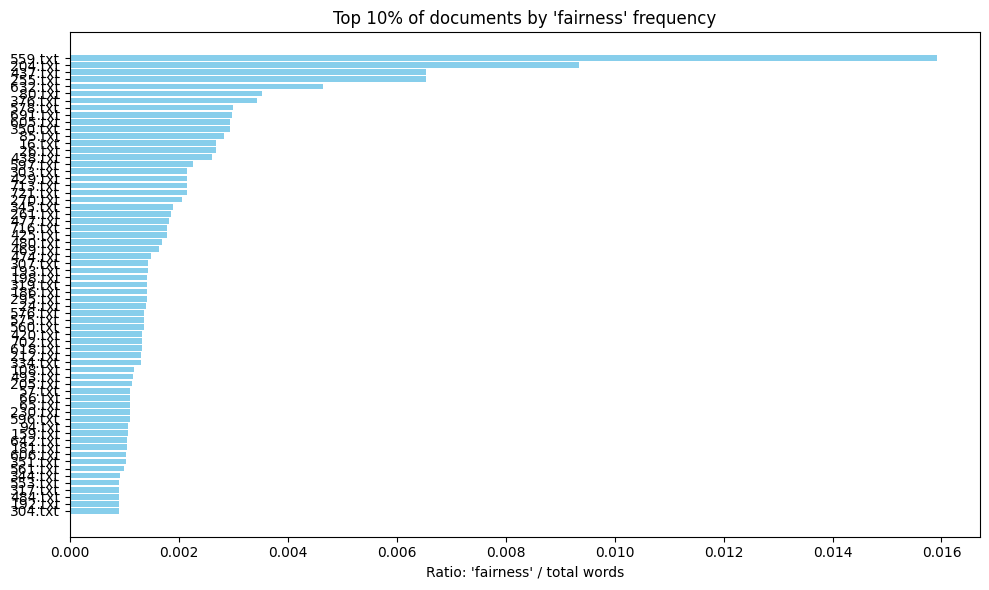

In [17]:
# To-do

import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

txt_dir = Path("mapaie/data/txts")

ratios = []
filenames = []

# Calculate ratio of 'fairness' occurrences per document
for f in txt_dir.iterdir():
    if f.is_file() and f.suffix == ".txt":
        text = f.read_text(encoding="utf-8", errors="ignore")
        words = text.split()
        total_words = len(words)
        fairness_count = sum(1 for w in words if w.lower().strip(".,!?") == "fairness")
        ratio = fairness_count / total_words if total_words > 0 else 0
        ratios.append(ratio)
        filenames.append(f.name)

# Convert to array for easier thresholding
ratios_array = np.array(ratios)
threshold = np.percentile(ratios_array, 90)  # top 10%
top_indices = np.where(ratios_array >= threshold)[0]

# Sort top documents by ratio descending
top_indices = top_indices[np.argsort(ratios_array[top_indices])[::-1]]

top_filenames = [filenames[i] for i in top_indices]
top_ratios = [ratios[i] for i in top_indices]

# Bar chart visualization
plt.figure(figsize=(10, 6))
plt.barh(top_filenames[::-1], top_ratios[::-1], color="skyblue")
plt.xlabel("Ratio: 'fairness' / total words")
plt.title("Top 10% of documents by 'fairness' frequency")
plt.tight_layout()
plt.show()

<font color="orange">2.2 Answer:</font> 

Now, we want to know more about the context in which the term _fairness_ appears in the corpus. 

<font color="red">2.3 Question:</font> Explore the context in which the term _fairness_ appears in the documents selected in the previous question (top 10% of the corpus). Please provide a visualisation and comment it.

Hint: you could for example consider n-grams containing _fairness_ (but feel free to explore context by other means!)

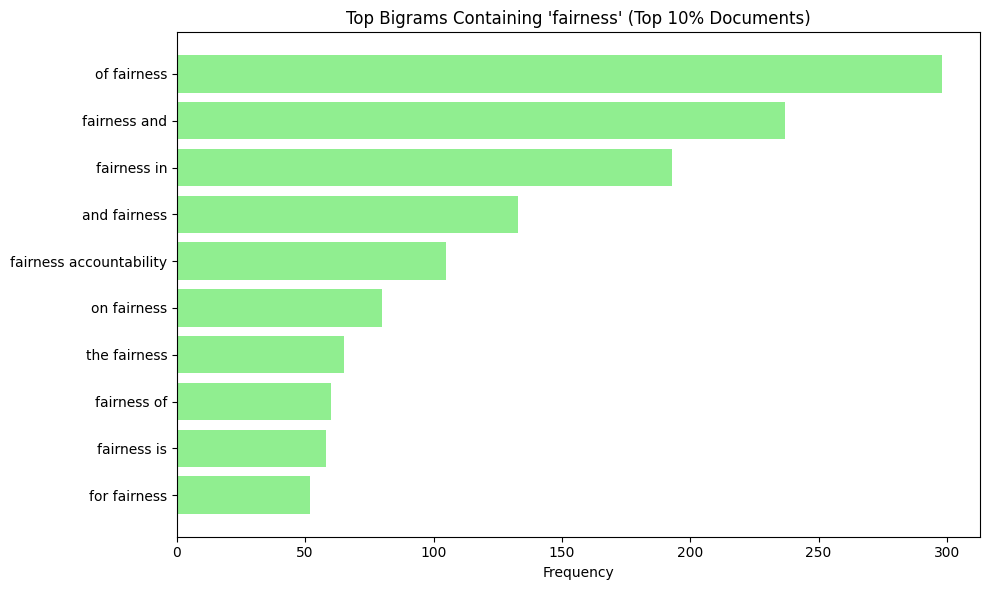

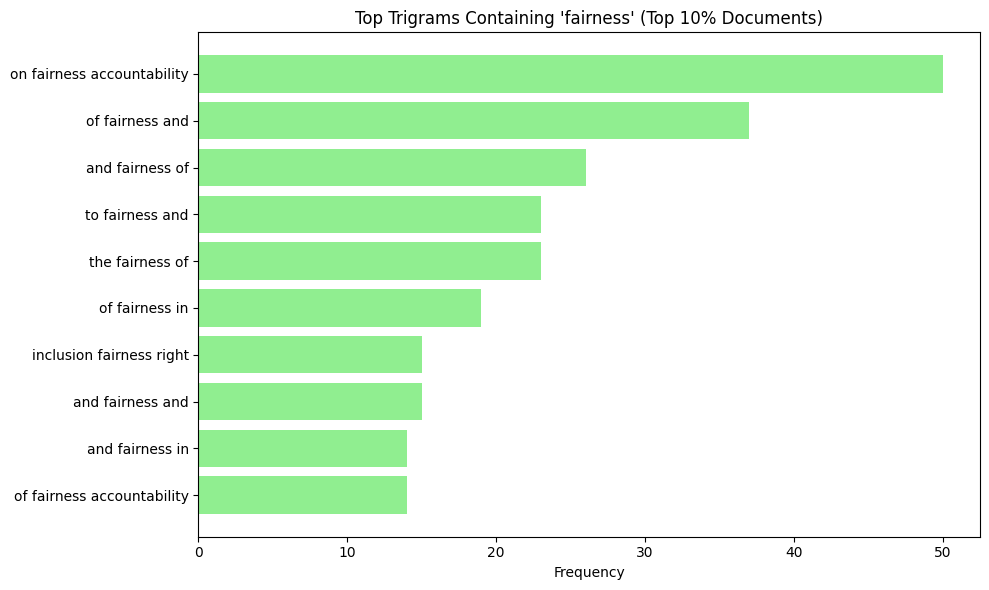

In [18]:
# To-do
import re
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

txt_dir = Path("mapaie/data/txts")

# --- Step 1: Compute fairness ratios to get top 10% documents ---
ratios = []
filenames = []

for f in txt_dir.iterdir():
    if f.is_file() and f.suffix == ".txt":
        text = f.read_text(encoding="utf-8", errors="ignore")
        words = text.split()
        total_words = len(words)
        fairness_count = sum(1 for w in words if w.lower().strip(".,!?") == "fairness")
        ratio = fairness_count / total_words if total_words > 0 else 0
        ratios.append(ratio)
        filenames.append(f.name)

ratios = np.array(ratios)
threshold = np.percentile(ratios, 90)
top_indices = np.where(ratios >= threshold)[0]
top_filenames = [filenames[i] for i in top_indices]

bigram_counter = Counter()
trigram_counter = Counter()

for fname in top_filenames:
    text = Path(txt_dir / fname).read_text(encoding="utf-8", errors="ignore").lower()
    words = [re.sub(r"[^\w]", "", w) for w in text.split()]
    words = [w for w in words if w]  # remove empty strings

    for i, w in enumerate(words):
        if w == "fairness":
            # Bigram before or after
            if i > 0:
                bigram_counter[(words[i - 1], w)] += 1
            if i < len(words) - 1:
                bigram_counter[(w, words[i + 1])] += 1

            # Trigram before or after
            if i > 0 and i < len(words) - 1:
                trigram_counter[(words[i - 1], w, words[i + 1])] += 1

top_bigrams = bigram_counter.most_common(10)
top_trigrams = trigram_counter.most_common(10)

def plot_ngrams(ngrams, title):
    labels = [" ".join(ng[0]) for ng in ngrams]
    counts = [ng[1] for ng in ngrams]
    plt.figure(figsize=(10, 6))
    plt.barh(labels[::-1], counts[::-1], color="lightgreen")
    plt.xlabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_ngrams(top_bigrams, "Top Bigrams Containing 'fairness' (Top 10% Documents)")
plot_ngrams(top_trigrams, "Top Trigrams Containing 'fairness' (Top 10% Documents)")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


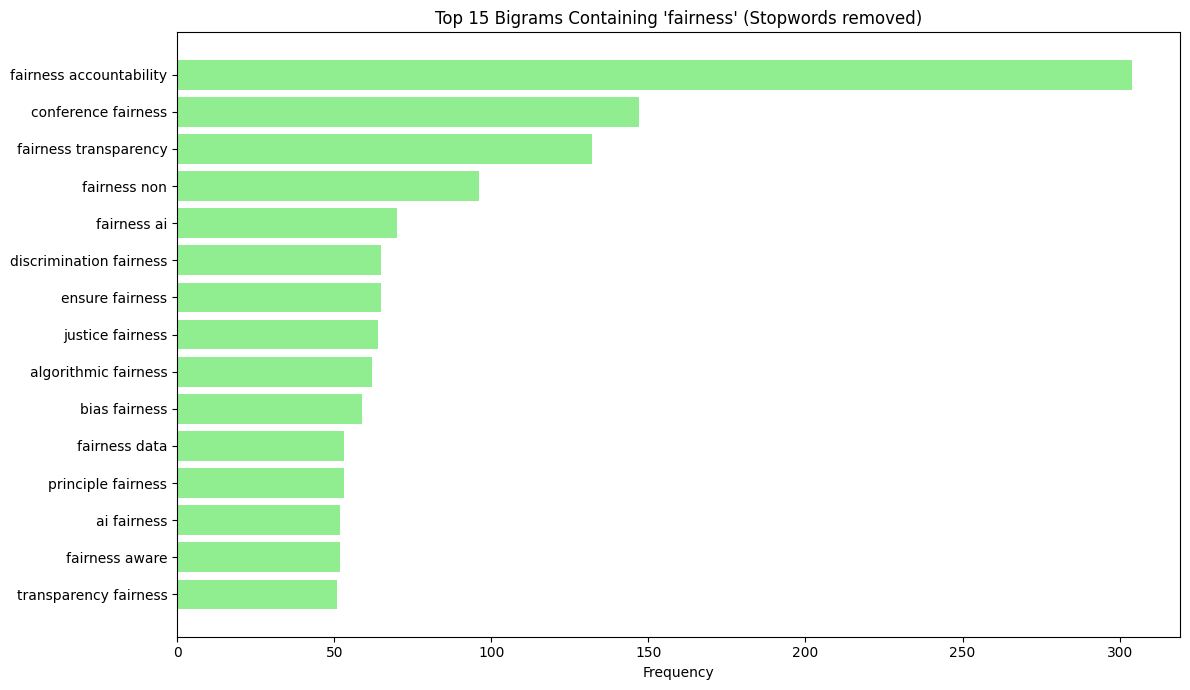

In [23]:
import os
import re
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Make sure NLTK stopwords are downloaded
nltk.download("stopwords")

# --- Settings ---
txt_dir = Path("mapaie/data/txts")
stop_words = set(stopwords.words("english"))
n_top = 15  # number of bigrams to display

# --- Helper function to tokenize & clean ---
def tokenize(text):
    # Keep only alphabetic words, lowercase, and remove stopwords
    tokens = [w.lower() for w in re.findall(r'\b[a-zA-Z]{2,}\b', text)]
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

# --- Collect bigrams containing 'fairness' ---
bigram_counter = Counter()

for f in txt_dir.iterdir():
    if f.is_file() and f.suffix == ".txt":
        text = f.read_text(encoding="utf-8", errors="ignore")
        tokens = tokenize(text)
        for i in range(len(tokens) - 1):
            w1, w2 = tokens[i], tokens[i + 1]
            if "fairness" in (w1, w2):
                bigram_counter[(w1, w2)] += 1

# --- Get top bigrams ---
top_bigrams = bigram_counter.most_common(n_top)

# --- Prepare data for plotting ---
labels = [" ".join(bg[0]) for bg in top_bigrams]
counts = [bg[1] for bg in top_bigrams]

# --- Visualization ---
plt.figure(figsize=(12, 7))
plt.barh(labels[::-1], counts[::-1], color="lightgreen")
plt.xlabel("Frequency")
plt.title(f"Top {n_top} Bigrams Containing 'fairness' (Stopwords removed)")
plt.tight_layout()
plt.show()

<font color="orange">2.3 Answer:</font> 

We will now focus on a sentence-level analysis of our corpus and extract a sub-corpus of sentences that use the word _fairness_.

<font color="red">2.4 Question:</font> What information will we lose by focusing on extracted sentences? Please provide three answers.

<font color="orange">2.4 Answer:</font> 

We will definitely loose information, but focusing on a sentence-level analysis gives us access to finer-grained means of linguistic analysis. 

<font color="red">2.5 Question:</font> Extract the _fairness-MapAIE_ corpus: a corpus of sentences of MapAIE containing the term _fairness_. Organise the data in such a way that, for each sentence, we have:
- the textual content of the sentence;
- the identifier (number) of the document this sentence is extracted from.
How many sentences does the _fairness-MapAIE_ corpus contain?

In [4]:
import spacy
from pathlib import Path
import pandas as pd
import re
from tqdm import tqdm

# --- Load spaCy English model ---
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "tagger"])

# Add sentencizer for sentence segmentation
nlp.add_pipe("sentencizer")

# Increase max_length to handle large files
nlp.max_length = 3_000_000  # adjust depending on the largest file

# --- Path to folder containing text files ---
txt_dir = Path("mapaie/data/txts")

# Storage for extracted sentences
sentences_data = []

# --- Get list of text files ---
text_files = sorted([f for f in txt_dir.iterdir() if f.is_file() and f.suffix == ".txt"])

# --- Iterate over documents with tqdm progress bar ---
for f in tqdm(text_files, desc="Processing documents"):
    with f.open(encoding="utf-8", errors="ignore") as file:
        text = file.read()

    # Process document with spaCy
    doc = nlp(text)

    # Use filename (without extension) as document_id
    document_id = f.stem

    # Extract sentences containing 'fairness'
    for sent in doc.sents:
        sentence_text = sent.text.strip()
        if re.search(r"\bfairness\b", sentence_text, flags=re.IGNORECASE):
            sentences_data.append({
                "document_id": document_id,
                "sentence": sentence_text
            })

# --- Convert to DataFrame ---
fairness_corpus_df = pd.DataFrame(sentences_data)

# --- Number of sentences ---
num_sentences = len(fairness_corpus_df)
print(f"\nNumber of sentences in the fairness-MapAIE corpus: {num_sentences}")

# --- Optional: Preview ---
if not fairness_corpus_df.empty:
    print(fairness_corpus_df.head())
else:
    print("No sentences containing 'fairness' were found.")

# --- Optional: Save to CSV ---
output_path = Path("fairness_MapAIE_corpus.csv")
fairness_corpus_df.to_csv(output_path, index=False)
print(f"Saved extracted corpus to: {output_path.resolve()}")

Processing documents: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [09:39<00:00,  1.12it/s]


Number of sentences in the fairness-MapAIE corpus: 3067
  document_id                                           sentence
0           0  Keywords: accountability, autonomy, artificial...
1           0  Elsewhere ‘justice’ has still other meanings (...
2         101  1111/j. 1740-9713.2016.00960.x; Solon Barocas ...
3         101  13  A vibrant community of academic researcher...
4         101  Proceedings of Machine Learning Research 81:1–...
Saved extracted corpus to: /Users/albert/Desktop/ms_ia_tp/notebooks/IA717 - Natural Language Processing/fairness_MapAIE_corpus.csv


In [37]:
from pathlib import Path
import pandas as pd
import re
from tqdm import tqdm
import nltk

# Make sure required NLTK data is downloaded
nltk.download("punkt")  # sentence tokenizer

# --- Path to folder containing text files ---
txt_dir = Path("mapaie/data/txts")

# Storage for extracted sentences
sentences_data = []

# --- Get list of text files ---
text_files = sorted([f for f in txt_dir.iterdir() if f.is_file() and f.suffix == ".txt"])

# --- Iterate over documents with tqdm progress bar ---
for f in tqdm(text_files, desc="Processing documents"):
    with f.open(encoding="utf-8", errors="ignore") as file:
        text = file.read()

    # --- Sentence tokenization with NLTK (preserves original order)
    sentences = nltk.sent_tokenize(text)

    # Convert filename to int if possible, otherwise keep as string
    try:
        document_id = int(f.stem)
    except ValueError:
        document_id = f.stem

    # --- Filter sentences containing 'fairness' (order preserved)
    selected_sentences = [
        s.strip() for s in sentences
        if re.search(r"\bfairness\b", s, flags=re.IGNORECASE)
    ]

    # Append them in the original order
    for s in selected_sentences:
        sentences_data.append({
            "document_id": document_id,
            "sentence": s
        })

# --- Convert to DataFrame ---
fairness_corpus_df = pd.DataFrame(sentences_data)

# Automatically assign order per document using groupby + cumcount
fairness_corpus_df["sentence_order"] = fairness_corpus_df.groupby("document_id").cumcount()

# Sort by document_id (numeric if possible) and sentence_order
fairness_corpus_df = fairness_corpus_df.sort_values(
    by=["document_id", "sentence_order"],
    key=lambda col: col if col.name != "document_id" or pd.api.types.is_numeric_dtype(col)
    else col.astype(str).str.zfill(10)
).reset_index(drop=True)

# --- Number of sentences ---
num_sentences = len(fairness_corpus_df)
print(f"\nNumber of sentences in the fairness-MapAIE corpus: {num_sentences}")

# --- Optional: Preview ---
if not fairness_corpus_df.empty:
    print(fairness_corpus_df.head(10))
else:
    print("No sentences containing 'fairness' were found.")

# --- Save to CSV ---
output_path = Path("fairness_MapAIE_corpus_nltk_sorted.csv")
fairness_corpus_df.to_csv(output_path, index=False)
print(f"Saved extracted corpus to: {output_path.resolve()}")

[nltk_data] Downloading package punkt to /Users/albert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing documents: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:03<00:00, 190.21it/s]


Number of sentences in the fairness-MapAIE corpus: 3046
   document_id  \
0            0   
1            0   
2           12   
3           12   
4           12   
5           12   
6           14   
7           14   
8           14   
9           14   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                sentence  \
0                                                                                           

In [38]:
from pathlib import Path
import pandas as pd
import re
from tqdm import tqdm
import nltk

# ✅ Make sure required NLTK data is downloaded
nltk.download("punkt")  # sentence tokenizer

# --- Path to folder containing text files ---
txt_dir = Path("mapaie/data/txts")

# Storage for extracted sentences
sentences_data = []

# --- Get list of text files ---
text_files = sorted([f for f in txt_dir.iterdir() if f.is_file() and f.suffix == ".txt"])

# --- Iterate over documents with tqdm progress bar ---
for f in tqdm(text_files, desc="Processing documents"):
    with f.open(encoding="utf-8", errors="ignore") as file:
        text = file.read()

    # --- Sentence tokenization with NLTK ---
    sentences = nltk.sent_tokenize(text)

    # ✅ Convert filename (stem) to int if possible
    try:
        document_id = int(f.stem)
    except ValueError:
        # Fallback: keep as string if not numeric
        document_id = f.stem

    # --- Extract sentences containing 'fairness' ---
    for sentence in sentences:
        if re.search(r"\bfairness\b", sentence, flags=re.IGNORECASE):
            sentences_data.append({
                "document_id": document_id,
                "sentence": sentence.strip()
            })

# --- Convert to DataFrame ---
fairness_corpus_df = pd.DataFrame(sentences_data)

# ✅ Sort by numeric document_id (int values will sort numerically)
fairness_corpus_df = fairness_corpus_df.sort_values(
    by="document_id", key=lambda col: col.astype(str).str.zfill(10) if col.dtype == object else col
).reset_index(drop=True)

# --- Number of sentences ---
num_sentences = len(fairness_corpus_df)
print(f"\nNumber of sentences in the fairness-MapAIE corpus: {num_sentences}")

# --- Optional: Preview ---
if not fairness_corpus_df.empty:
    print(fairness_corpus_df.head(10))
else:
    print("No sentences containing 'fairness' were found.")

# --- Optional: Save to CSV ---
output_path = Path("fairness_MapAIE_corpus_nltk_sorted.csv")
fairness_corpus_df.to_csv(output_path, index=False)
print(f"✅ Saved extracted corpus to: {output_path.resolve()}")

[nltk_data] Downloading package punkt to /Users/albert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing documents: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 650/650 [00:03<00:00, 195.70it/s]


Number of sentences in the fairness-MapAIE corpus: 3046
   document_id  \
0            0   
1            0   
2           12   
3           12   
4           12   
5           12   
6           14   
7           14   
8           14   
9           14   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                sentence  
0                                                                                            

<font color="orange">2.5 Answer:</font> 

## <font color="red">/!\ To do to get data for the rest of the project /!\ </font> 

### Make sure fairness-MapAIE is properly extracted and available in the project's git repository. Then, send an email to maria.boritchev@telecom-paris.fr to inform me of the availability of fairness-MapAIE so that I can produce data you need for part 3.

We continue by investigating the syntax of sentences. The baseline approach we will use for this part is part-of-speech (POS) tagging: by tagging the elements of sentences by POS, we can investigate the main syntactic roles taken by the term _fairness_.

<font color="red">2.6 Question:</font> What are the syntactic roles taken by the term _fairness_ in the _fairness-MapAIE_ corpus? Please provide a visualization and comment it.

In [15]:
import penman
from penman.models.noop import NoOpModel
import re
from pathlib import Path

# -----------------------------------------------------------
# 1. Read AMR blocks from file (start when line starts with "(")
# -----------------------------------------------------------
def read_amr_blocks(filepath):
    """
    Read a .amr file and return a list of cleaned Penman blocks.
    Each block starts with '(' and ignores preceding comments or junk lines.
    """
    blocks = []
    current_block = []

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            stripped = line.strip()

            # Skip comment lines
            if stripped.startswith('#'):
                continue

            # Start of a new AMR graph
            if stripped.startswith('('):
                if current_block:
                    blocks.append('\n'.join(current_block))
                    current_block = []
                current_block.append(stripped)
            else:
                # Continuation of current graph (skip empty junk before first '(')
                if current_block and stripped:
                    current_block.append(stripped)

    if current_block:
        blocks.append('\n'.join(current_block))

    return blocks

# -----------------------------------------------------------
# 2. Extract subgraph starting from a given node (DFS)
# -----------------------------------------------------------
def extract_subgraph(graph, subroot):
    visited = set()
    stack = [subroot]
    sub_triples = []
    while stack:
        node = stack.pop()
        if node in visited:
            continue
        visited.add(node)
        for (src, role, tgt) in graph.triples:
            if src == node:
                sub_triples.append((src, role, tgt))
                stack.append(tgt)
    return penman.Graph(sub_triples, top=subroot)

# -----------------------------------------------------------
# 3. Keep only connected triples from top (prevents LayoutError)
# -----------------------------------------------------------
def get_connected_subgraph(triples, top):
    visited = set()
    stack = [top]
    connected = []
    while stack:
        node = stack.pop()
        if node in visited:
            continue
        visited.add(node)
        for (src, role, tgt) in triples:
            if src == node:
                connected.append((src, role, tgt))
                stack.append(tgt)
    return connected

# -----------------------------------------------------------
# 4. Split into sentence graphs and remove nested sub-sentences
# -----------------------------------------------------------
def split_all_snt_without_duplicates(amr_str):
    try:
        g = penman.decode(amr_str, model=NoOpModel())
    except Exception as e:
        print(f"[!] Failed to decode AMR:\n{amr_str[:80]}...\nError: {e}")
        return []

    # Find all :snt* triples anywhere
    snt_triples = [(src, role, tgt) for (src, role, tgt) in g.triples if role.startswith(':snt')]

    if not snt_triples:
        return [penman.encode(g)]

    snt_targets = {tgt for (_, _, tgt) in snt_triples}

    sentences = []
    # 1. Extract sub-sentences first
    for (_, role, tgt) in snt_triples:
        sub_g = extract_subgraph(g, tgt)
        sentences.append(penman.encode(sub_g))

    # 2. Rebuild parent graph without those :snt* triples
    filtered_triples = [
        t for t in g.triples
        if not (t[1].startswith(':snt') and t[2] in snt_targets)
    ]

    connected_parent_triples = get_connected_subgraph(filtered_triples, g.top)
    if connected_parent_triples:
        parent_g = penman.Graph(connected_parent_triples, top=g.top)
        sentences.insert(0, penman.encode(parent_g))

    return sentences

# -----------------------------------------------------------
# 5. Filter sentences containing "fairness"
# -----------------------------------------------------------
def filter_fairness(sentences):
    return [s for s in sentences if re.search(r'\bfairness\b', s, re.IGNORECASE)]

# -----------------------------------------------------------
# 6. Main pipeline: read → split → filter → save
# -----------------------------------------------------------
def process_amr_file(input_path, output_path):
    input_path = Path(input_path)
    output_path = Path(output_path)

    blocks = read_amr_blocks(input_path)
    print(f"📥 Found {len(blocks)} AMR blocks in file {input_path}")

    all_sentences = []
    for block in blocks:
        sentences = split_all_snt_without_duplicates(block)
        fairness_sents = filter_fairness(sentences)
        all_sentences.extend(fairness_sents)

    with open(output_path, 'w', encoding='utf-8') as out:
        for s in all_sentences:
            out.write(s.strip() + '\n\n')

    print(f"✅ Wrote {len(all_sentences)} AMRs containing 'fairness' to {output_path}")

# -----------------------------------------------------------
# 7. Run
# -----------------------------------------------------------
if __name__ == "__main__":
    input_file = "fair_AMR-500.amr"          # your original file
    output_file = "fair_AMR-500_clean.amr"   # output file
    process_amr_file(input_file, output_file)


ignoring epigraph data for duplicate triple: ('a6', ':example', 'n8')
ignoring epigraph data for duplicate triple: ('c6', ':ARG1', 'p7')
ignoring epigraph data for duplicate triple: ('c6', ':ARG1', 'p7')
ignoring epigraph data for duplicate triple: ('a6', ':example', 'n8')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':op2', '"Union"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':op3', '"Union"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplica

📥 Found 500 AMR blocks in file fair_AMR-500.amr
✅ Wrote 379 AMRs containing 'fairness' to fair_AMR-500_clean.amr


In [22]:
import penman
from penman.models.noop import NoOpModel
import re
from collections import defaultdict, deque
from pathlib import Path

FAIRNESS_REGEX = re.compile(r'fairness|fair-[0-9]+', re.IGNORECASE)

def read_amr_blocks(filepath):
    """Parse AMR blocks starting at '('."""
    blocks = []
    current = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            if s.startswith('#'):
                continue
            if s.startswith('('):
                if current:
                    blocks.append('\n'.join(current))
                    current = []
                current.append(s)
            elif current and s:
                current.append(s)
    if current:
        blocks.append('\n'.join(current))
    return blocks

def build_graph_dict(triples):
    """
    Build adjacency and reverse adjacency dictionaries from triples.
    """
    adj = defaultdict(list)
    rev = defaultdict(list)
    for src, role, tgt in triples:
        adj[src].append((role, tgt))
        rev[tgt].append((role, src))
    return adj, rev

def find_fairness_nodes(triples):
    """
    Return set of node variable names that are 'fairness' or 'fair-*'.
    """
    fairness_nodes = set()
    for src, role, tgt in triples:
        if FAIRNESS_REGEX.search(src):
            fairness_nodes.add(src)
        if FAIRNESS_REGEX.search(tgt):
            fairness_nodes.add(tgt)
    return fairness_nodes

def shortest_distances_from_root(adj, root):
    """
    BFS to compute shortest distance (in edges) from root to every node.
    """
    dist = {root: 0}
    queue = deque([root])
    while queue:
        node = queue.popleft()
        for _, tgt in adj[node]:
            if tgt not in dist:
                dist[tgt] = dist[node] + 1
                queue.append(tgt)
    return dist

def get_incoming_roles(rev):
    """
    Map each node to the list of incoming roles.
    """
    incoming = {}
    for node, lst in rev.items():
        roles = [r for r, _ in lst]
        incoming[node] = roles
    return incoming

def analyze_fairness_centrality(amr_str):
    """
    For a single AMR graph: measure fairness distance from root and role types.
    """
    g = penman.decode(amr_str, model=NoOpModel())
    adj, rev = build_graph_dict(g.triples)
    fairness_nodes = find_fairness_nodes(g.triples)
    distances = shortest_distances_from_root(adj, g.top)
    incoming_roles = get_incoming_roles(rev)

    centrality_info = []
    for fn in fairness_nodes:
        dist = distances.get(fn, None)
        roles = incoming_roles.get(fn, [])
        centrality_info.append({
            'node': fn,
            'distance': dist,
            'roles': roles
        })
    return centrality_info

def quantify_fairness_centrality(filepath):
    blocks = read_amr_blocks(filepath)

    all_distances = []
    role_counter = defaultdict(int)
    graphs_with_fairness = 0

    for block in blocks:
        try:
            info = analyze_fairness_centrality(block)
        except Exception:
            continue
        if info:
            graphs_with_fairness += 1
        for item in info:
            if item['distance'] is not None:
                all_distances.append(item['distance'])
            for r in item['roles']:
                role_counter[r] += 1

    if not all_distances:
        print("No fairness nodes found.")
        return

    avg_distance = sum(all_distances) / len(all_distances)
    min_distance = min(all_distances)
    max_distance = max(all_distances)

    sorted_roles = sorted(role_counter.items(), key=lambda x: x[1], reverse=True)

    print("📊 Fairness Centrality Analysis")
    print(f"Graphs with fairness: {graphs_with_fairness}")
    print(f"Total fairness nodes: {len(all_distances)}")
    print(f"Distance from root: avg={avg_distance:.2f}, min={min_distance}, max={max_distance}")
    print(f"Most common incoming roles for fairness:")
    for r, c in sorted_roles[:10]:
        print(f"  {r:10s}  {c}")


quantify_fairness_centrality("fair_AMR-500.amr")

ignoring epigraph data for duplicate triple: ('a6', ':example', 'n8')
ignoring epigraph data for duplicate triple: ('c6', ':ARG1', 'p7')
ignoring epigraph data for duplicate triple: ('c6', ':ARG1', 'p7')
ignoring epigraph data for duplicate triple: ('a6', ':example', 'n8')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':op2', '"Union"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':op3', '"Union"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplica

📊 Fairness Centrality Analysis
Graphs with fairness: 460
Total fairness nodes: 495
Distance from root: avg=4.84, min=1, max=13
Most common incoming roles for fairness:
  :instance   481
  :op3        18
  :op2        11
  :op1        11
  :op4        10
  :op7        7
  :op6        6
  :value      4
  :op5        2
  :op8        2


In [ ]:
import penman
from penman.models.noop import NoOpModel
import re
from collections import defaultdict, deque
from pathlib import Path

FAIRNESS_REGEX = re.compile(r'fairness|fair-[0-9]+', re.IGNORECASE)

ROLE_WEIGHTS = defaultdict(lambda: 0.4, {
    ':ARG0': 0.9, ':ARG0-of': 0.9, ':ARG1': 0.7, ':ARG2': 0.7, ':ARG3': 0.7,
    ':domain': 0.6, ':mod': 0.6
})

def read_amr_blocks(filepath):
    """Parse AMR blocks starting at '('."""
    blocks = []
    current = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            if s.startswith('#'):
                continue
            if s.startswith('('):
                if current:
                    blocks.append('\n'.join(current))
                    current = []
                current.append(s)
            elif current and s:
                current.append(s)
    if current:
        blocks.append('\n'.join(current))
    return blocks

def build_graph_dict(triples):
    adj = defaultdict(list)
    rev = defaultdict(list)
    for src, role, tgt in triples:
        adj[src].append((role, tgt))
        rev[tgt].append((role, src))
    return adj, rev

def find_fairness_nodes(triples):
    fairness_nodes = set()
    for src, role, tgt in triples:
        if FAIRNESS_REGEX.search(src):
            fairness_nodes.add(src)
        if FAIRNESS_REGEX.search(tgt):
            fairness_nodes.add(tgt)
    return fairness_nodes

def shortest_distances_from_root(adj, root):
    dist = {root: 0}
    queue = deque([root])
    while queue:
        node = queue.popleft()
        for _, tgt in adj[node]:
            if tgt not in dist:
                dist[tgt] = dist[node] + 1
                queue.append(tgt)
    return dist

def get_incoming_roles(rev):
    incoming = defaultdict(list)
    for node, lst in rev.items():
        roles = [r for r, _ in lst]
        incoming[node] = roles
    return incoming

def fairness_score_for_graph(amr_str, graph_id):
    """
    Compute a fairness centrality score for a single AMR graph.
    Returns (graph_id, score, fairness_node_count, amr_str).
    """
    try:
        g = penman.decode(amr_str, model=NoOpModel())
    except Exception:
        return (graph_id, 0.0, 0, amr_str)

    adj, rev = build_graph_dict(g.triples)
    fairness_nodes = find_fairness_nodes(g.triples)
    if not fairness_nodes:
        return (graph_id, 0.0, 0, amr_str)

    distances = shortest_distances_from_root(adj, g.top)
    incoming_roles = get_incoming_roles(rev)

    total_score = 0.0
    for fn in fairness_nodes:
        dist = distances.get(fn, None)
        if dist is None:
            continue
        roles = incoming_roles.get(fn, [])
        # if multiple incoming roles, take max weight
        weight = max([ROLE_WEIGHTS[r] for r in roles], default=1.0 if fn == g.top else 0.4)
        # top node fairness (no incoming roles)
        if fn == g.top:
            weight = 1.0
        total_score += weight * (1 / (1 + dist))

    avg_score = total_score / len(fairness_nodes)
    return (graph_id, avg_score, len(fairness_nodes), amr_str)

def top_k_fairness_graphs(filepath, k=5):
    blocks = read_amr_blocks(filepath)

    scored_graphs = []
    for i, block in enumerate(blocks):
        scored_graphs.append(fairness_score_for_graph(block, i))

    scored_graphs.sort(key=lambda x: x[1], reverse=True)
    top_graphs = scored_graphs[:k]

    print(f"Top {k} graphs by fairness centrality:\n")
    for gid, score, count, amr_str in top_graphs:
        print(f"Graph #{gid} | Score: {score:.3f} | Fairness nodes: {count}")
        print(amr_str)
        print("-" * 60)
        
top_k_fairness_graphs("data/fair_AMR-500.amr", k=10)

ignoring epigraph data for duplicate triple: ('a6', ':example', 'n8')
ignoring epigraph data for duplicate triple: ('c6', ':ARG1', 'p7')
ignoring epigraph data for duplicate triple: ('c6', ':ARG1', 'p7')
ignoring epigraph data for duplicate triple: ('a6', ':example', 'n8')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':op2', '"Union"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplicate triple: ('m', ':op3', '"Union"')
ignoring epigraph data for duplicate triple: ('m', ':name', 'n')
ignoring epigraph data for duplicate triple: ('m', ':op1', '"European"')
ignoring epigraph data for duplica

Top 10 graphs by fairness centrality:

Graph #200 | Score: 0.200 | Fairness nodes: 1
(f / fairness
:li 6)
------------------------------------------------------------
Graph #297 | Score: 0.200 | Fairness nodes: 1
(f / fairness)
------------------------------------------------------------
Graph #326 | Score: 0.200 | Fairness nodes: 1
(f / fairness)
------------------------------------------------------------
Graph #6 | Score: 0.133 | Fairness nodes: 1
(a / and
:li 6
:op1 (d / diversity)
:op2 (d2 / discriminate-01
:polarity -)
:op3 (f / fairness))
------------------------------------------------------------
Graph #71 | Score: 0.133 | Fairness nodes: 1
(p / publication-91
:ARG0 (a / and
:op1 (p2 / person
:name (n / name
:op1 "Animesh"
:op2 "Singh"))
:op2 (p3 / person
:name (n2 / name
:op1 "Michael"
:op2 "Hind")))
:ARG1 (p4 / publication
:name (n3 / name
:op1 "Attacking"
:op2 "Bias"
:op3 360
:op4 "from"
:op5 "All"
:op6 "Angles"))
:ARG4 (c / company
:name (n4 / name
:op1 "IBM")
:ARG0-of (d 

<font color="orange">2.6 Answer:</font> 

# <font color="green">**3 - AMR graphs exploration**</font>


We now investigate the semantics of sentences using Abstract Meaning Representation. Abstract Meaning Representation (AMR, <a href="https://aclanthology.org/W13-2322.pdf">Banarescu et al, 2013</a>)  provides a framework to model the meaning of a sentence, notably actions, events or states and their participants. AMR relies heavily on (verbal) concepts defined in <a href="https://propbank.github.io/">PropBank</a> . The figure below shows an AMR representation for the sentence "Barack Obama was born in 1961". In this figure, ```bear-02``` stands for PropBank's second sense for the verb ''to bear''. Instances are indicated by a following ```/```, for example  ```p``` is an instance of the concept  ```person ```. The names of the variables do not have any particular meaning, they have to be distinct. Relations are indicated by an initial colon (ex:  ```:ARG1```,  ```:time```). Literals (strings and numbers) lack a preceding instance and  ```/``` (ex:  ``` ``Obama'' ``` and  ```1961```. More info on AMR syntax can be found here: https://github.com/amrisi/amr-guidelines/blob/master/amr.md
.

<center>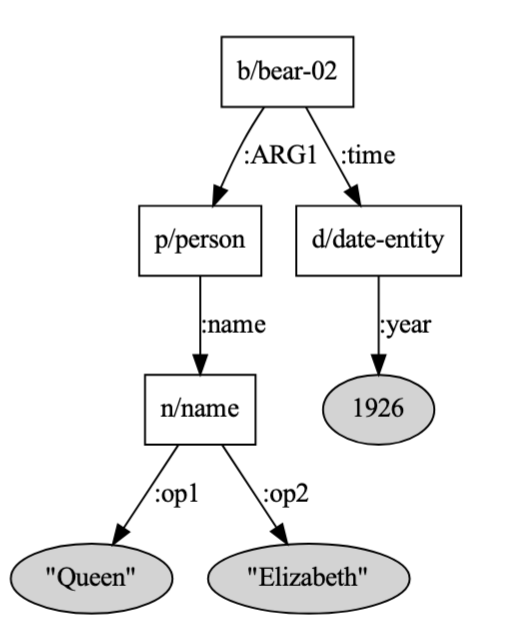</center>

The same graph can be represented in a serialised format called PENMAN format: 
```
(b / bear-02
    :ARG1 (p / person
        :name (n / name
            :op1 "Queen"
            :op2 "Elizabeth"))
    :time (d / date-entity
        :year 1926))
```

AMR graphs for fairness-MapAIE are provided in the file `fairness-MapAIE_penmans.amr`. It is text file containing, for each sentence:
- a line `::snt`, providing the original sentence in English;
- a line with the file number;
- the AMR graph in PENMAN format.

<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _fairness_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

<font color="orange">3.1 Answer:</font> 

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _fairness_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _fairness_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _fairness_;
- the siblings (concepts with the same parent) of the term _fairness_;
- the children (inferior concepts) of the term _fairness_;
- the relationships linking _fairness_ to its parents and its children.

<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

In [ ]:
# To-do

<font color="orange">3.2 Answer:</font> 